In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
file_path = '/content/cars.csv'
df = pd.read_csv(file_path)

# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [3]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [4]:
df.tail()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.
260,22.0,6,250,105,3353,15,1977,US.


In [5]:
# Convert 'cubicinches' and 'weightlbs' to numeric values
df[' cubicinches'] = pd.to_numeric(df[' cubicinches'], errors='coerce')
df[' weightlbs'] = pd.to_numeric(df[' weightlbs'], errors='coerce')


In [6]:
# Rename columns to remove extra spaces
df.columns = df.columns.str.strip()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


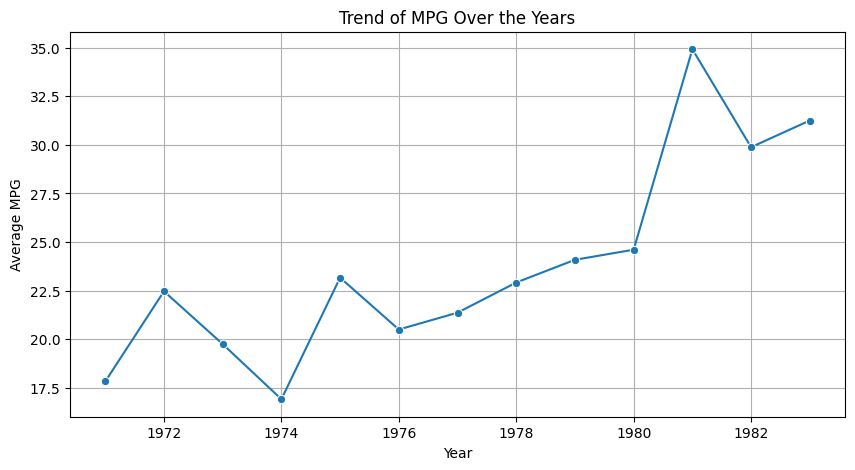

In [8]:
# Can you find that there is improvement in mpg over the years ?
# 1. Analyze MPG trend over the years
mpg_trend = df.groupby("year")["mpg"].mean()

# Plot the trend of MPG over years
plt.figure(figsize=(10, 5))
sns.lineplot(x=mpg_trend.index, y=mpg_trend.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Average MPG")
plt.title("Trend of MPG Over the Years")
plt.grid(True)
plt.show()


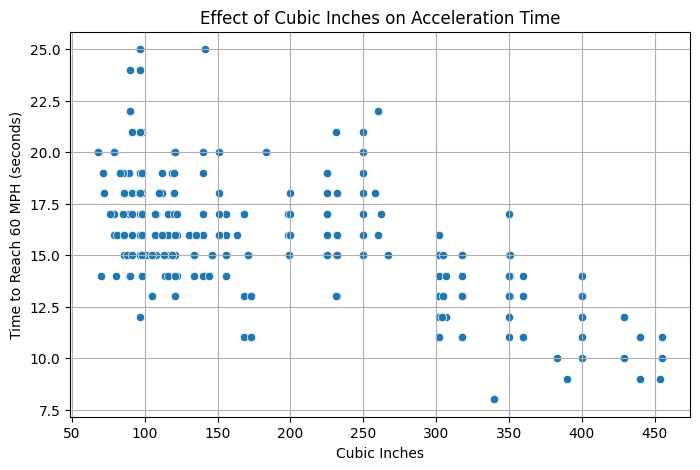

In [9]:
# Does cubicinches of a vehicle affects the vehicles time to reach 60 Miles per hour?
# 2. Analyze the relationship between cubic inches and time-to-60
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["cubicinches"], y=df["time-to-60"])
plt.xlabel("Cubic Inches")
plt.ylabel("Time to Reach 60 MPH (seconds)")
plt.title("Effect of Cubic Inches on Acceleration Time")
plt.grid(True)
plt.show()


<ipython-input-10-d7f515f9dc00>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hp_by_country.index, y=hp_by_country.values, palette="viridis")


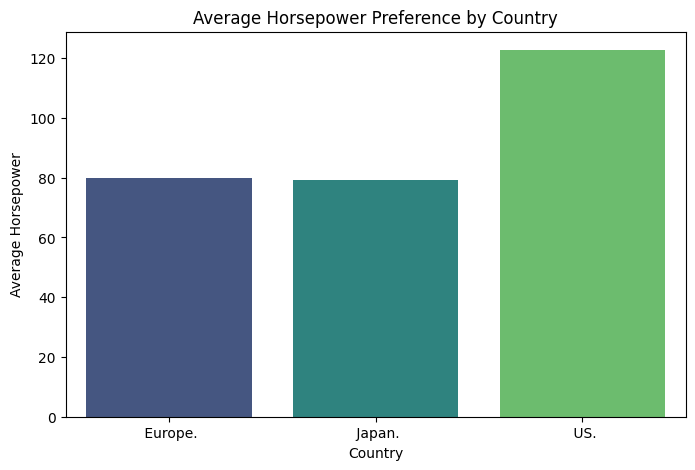

In [10]:
# Does a specific country prefer vehicles with more horse power ?
# 3. Analyze horsepower preference by country

hp_by_country = df.groupby("brand")["hp"].mean()
# Plot the horsepower preference by country
plt.figure(figsize=(8, 5))
sns.barplot(x=hp_by_country.index, y=hp_by_country.values, palette="viridis")
plt.xlabel("Country")
plt.ylabel("Average Horsepower")
plt.title("Average Horsepower Preference by Country")
plt.show()


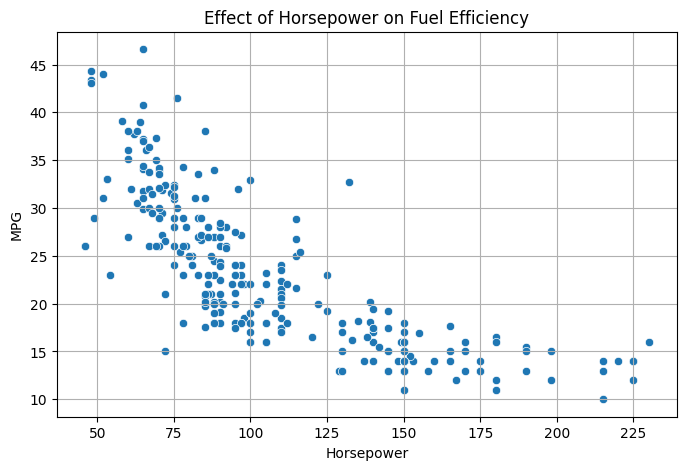

In [11]:
# How does the horse power affects the average of the vehicle ?
# 4. Analyze the relationship between horsepower and MPG

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["hp"], y=df["mpg"])
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Effect of Horsepower on Fuel Efficiency")
plt.grid(True)
plt.show()

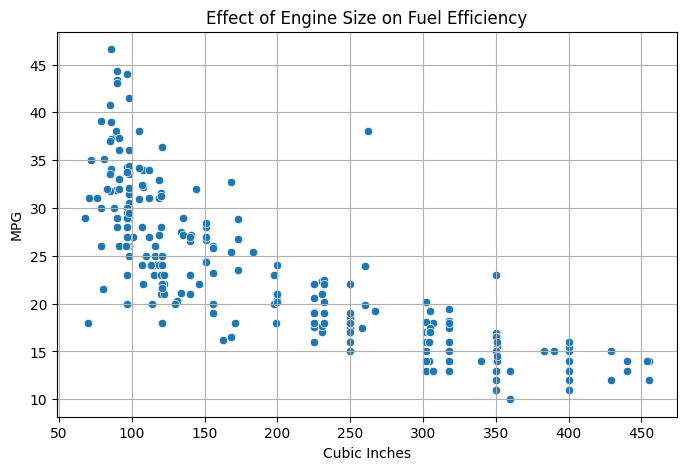

In [12]:
# How does the cubic inches affects the average of the vehicle ?
# 5. Analyze the relationship between cubic inches and MPG

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["cubicinches"], y=df["mpg"])
plt.xlabel("Cubic Inches")
plt.ylabel("MPG")
plt.title("Effect of Engine Size on Fuel Efficiency")
plt.grid(True)
plt.show()



<ipython-input-13-111d77b37ed6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["cylinders"], y=df["mpg"], palette="coolwarm")


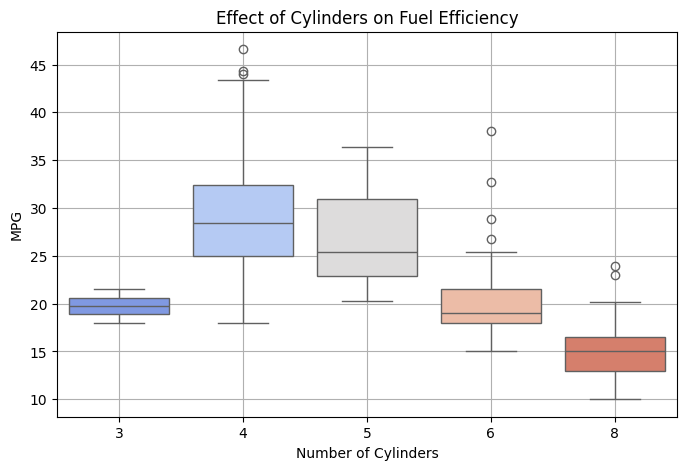

In [13]:
# What is the effect of number of cylinders on the mpg ?
# 6. Analyze the effect of the number of cylinders on MPG

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["cylinders"], y=df["mpg"], palette="coolwarm")
plt.xlabel("Number of Cylinders")
plt.ylabel("MPG")
plt.title("Effect of Cylinders on Fuel Efficiency")
plt.grid(True)
plt.show()


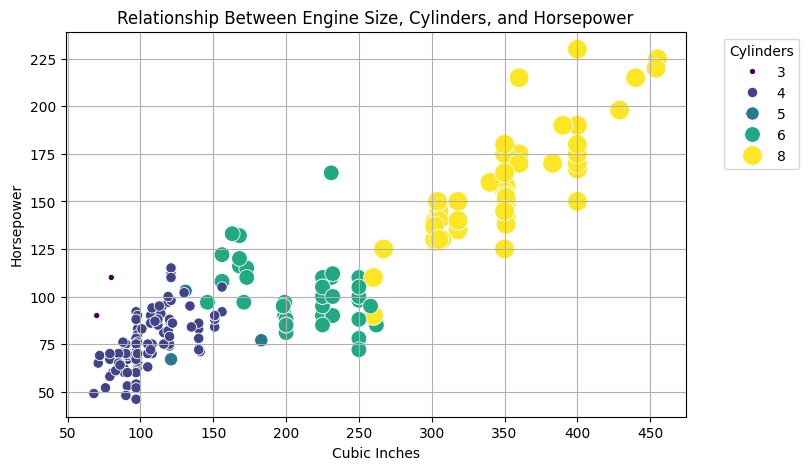

In [14]:
# What relation between cubic inches , number of cylinders and horse power you can observe from the data ?
# 7. Analyze the relationship between cubic inches, cylinders, and horsepower

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["cubicinches"], y=df["hp"], hue=df["cylinders"], palette="viridis", size=df["cylinders"], sizes=(20, 200))
plt.xlabel("Cubic Inches")
plt.ylabel("Horsepower")
plt.title("Relationship Between Engine Size, Cylinders, and Horsepower")
plt.legend(title="Cylinders", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [15]:
# How much proportion of the total records is occupied by vehicles with 8 cylinders ?
# 8. Calculate the proportion of vehicles with 8 cylinders

total_vehicles = len(df)
vehicles_with_8_cylinders = len(df[df["cylinders"] == 8])
proportion_8_cylinders = (vehicles_with_8_cylinders / total_vehicles) * 100

proportion_8_cylinders


29.118773946360154